# Lab 1 BFS DFS

In [ ]:
import numpy as np
from random import randint
import networkx as nx
import matplotlib.pyplot as plt
import random
MIN_X = -100
MIN_Y = -100
MIN_Z = 0
MAX_X = 100
MAX_Y = 100
MAX_Z = 50
NUMBER_OF_CONNECTIONS = 2
NUMBER_OF_CITIES = 4


class City:
    def __init__(self) -> None:
        self.cords = np.array([
            randint(MIN_X, MAX_X),
            randint(MIN_Y, MAX_Y),
            randint(MIN_Z, MAX_Z)
        ])
        self.distances = []


class WebOfCities:
    def __init__(self, number_of_cities) -> None:
        self.number_of_cities = number_of_cities
        self.cities = []
        self.create_list_of_cities()

    def create_list_of_cities(self):
        self.cities = [City() for _ in range(0, self.number_of_cities)]

    def create_weighted_connections_100(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if city.cords[2]  > self.cities[i].cords[2]:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords)*0.9)
                elif city.cords[2]  < self.cities[i].cords[2]:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords)*1.1)
                else:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords))
            city.distances = distance

    def create_weighted_connections_80(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if city.cords[2]  > self.cities[i].cords[2]:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)*0.9
                elif city.cords[2]  < self.cities[i].cords[2]:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)*1.1
                else:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)
                if random.random() > 0.2:
                    distance.append(actual_distance)
                else:
                    distance.append(0)
            city.distances = distance

    def create_connections_100(self):
        for city in self.cities:
            distance = [np.linalg.norm(city.cords - self.cities[i].cords) for i in range(0, len(self.cities))]
            city.distances = distance
    
    def create_connections_80(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if random.random() > 0.2:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords))
                else:
                    distance.append(0)
            city.distances = distance

class Graph:
    def __init__(self, cities) -> None:
        self.cities = cities

    def create_adjacency_matrix(self):
        adjacency_matrix_ls = []
        for city in self.cities:
            list_of_distance = []
            for distance in city.distances:
                list_of_distance.append(distance)
            adjacency_matrix_ls.append(list_of_distance)
        adjacency_matrix = np.array(adjacency_matrix_ls)
        return adjacency_matrix

    def create_adjacency_weighted_matrix(self):
        adjacency_matrix_ls = []
        for city in self.cities:
            list_of_distance = []
            for distance in city.distances:
                list_of_distance.append(distance)
            adjacency_matrix_ls.append(list_of_distance)
        adjacency_matrix = np.array(adjacency_matrix_ls)
        return adjacency_matrix

In [2]:
class PathCounter:
    def __init__(self, adjacency_matrix, all_paths) -> None:
        self.adjacency_matrix = adjacency_matrix
        self.all_paths = all_paths
        self.all_distances = []
        self.index_of_min_distance = 0

    def count_all_distances(self):
        for path in self.all_paths:
            distance = 0
            for i in range(len(path)-1):
                distance += self.adjacency_matrix[path[i]][path[i+1]]
            self.all_distances.append(distance)

    def print_min_possible_path(self):
        min_distance = min(self.all_distances)
        self.index_of_min_distance = self.all_distances.index(min_distance)
        print(f"min distance is {min_distance} for path")
        print(self.all_paths[self.index_of_min_distance])
        return self.all_paths[self.index_of_min_distance]

In [3]:
class BranchAlgorytm:
    def __init__(self, graph, start) -> None:
        self.graph = graph
        self.start = start

    def tsp_dfs(self):
        all_paths = []
        num_cities = len(self.graph)
        stack = [[self.start]]

        while stack:
            path = stack.pop(0)
            curr_city = path[-1]

            if len(path) == num_cities:
                last_city = path[-1]
                if self.graph[last_city][0] != 0:
                    path.append(0)
                    all_paths.append(path)
                    #print(path)
                continue

            for next_city in range(num_cities):
                if next_city not in path and self.graph[curr_city][next_city] != 0:
                    stack.append(path + [next_city])
                    #print(stack)

        return all_paths
    
    def tsp_bfs(self):
        all_paths = []
        num_cities = len(self.graph)
        stack = [[self.start]] 

        while stack:
            path = stack.pop()
            curr_city = path[-1]

            if len(path) == num_cities:
                last_city = path[-1]
                if self.graph[last_city][0] != 0:
                    path.append(0)
                    all_paths.append(path)
                    #print(path)
                continue

            for next_city in range(num_cities):
                if next_city not in path and self.graph[curr_city][next_city] != 0:
                    stack.append(path + [next_city])
                    #print(stack)

        return all_paths

In [4]:
class CitiesDrawer:
    def __init__(self, cities, best_path) -> None:
        self.cities = cities
        self.best_path = best_path
        self.X_cords = []
        self.Y_cords = []

    def _get_XY_cords_of_cities(self):
        for city_idx in self.best_path:
            self.X_cords.append(self.cities[city_idx].cords[0])
            self.Y_cords.append(self.cities[city_idx].cords[1])

    def draw_cities(self):
        self._get_XY_cords_of_cities()

        plt.scatter(self.X_cords, self.Y_cords, color='blue')

        for i in range(len(self.cities) - 1):
            plt.plot([self.X_cords[i], self.X_cords[i + 1]], [self.Y_cords[i], self.Y_cords[i + 1]], color='blue')

        plt.plot([self.X_cords[len(self.cities) - 1], self.X_cords[0]], [self.Y_cords[len(self.cities) - 1], self.Y_cords[0]], color='blue')

Wszystkie miasta są połączone, połączenia nie mają wag

In [5]:
START_CITY = 0


web = WebOfCities(5)
graph = Graph(web.cities)
web.create_connections_100()
adjacency_matrix = graph.create_adjacency_matrix()
print(adjacency_matrix)

[[  0.          82.77076779 105.80642703  28.28427125 135.56548233]
 [ 82.77076779   0.         166.73332001 108.89903581 154.62535368]
 [105.80642703 166.73332001   0.          86.04068805 102.84454288]
 [ 28.28427125 108.89903581  86.04068805   0.         137.00364959]
 [135.56548233 154.62535368 102.84454288 137.00364959   0.        ]]


min distance is 454.5656236403764 for path
[0, 1, 4, 2, 3, 0]
min distance is 454.5656236403764 for path
[0, 3, 2, 4, 1, 0]


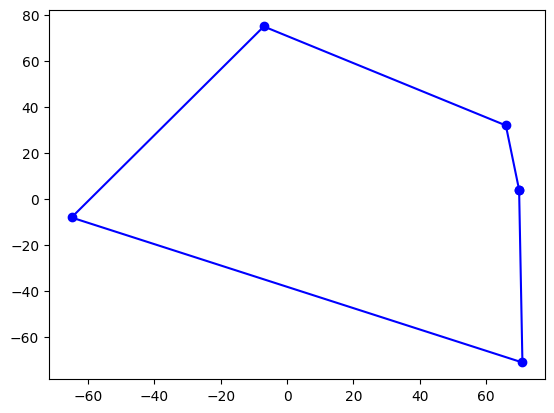

In [6]:

branch_algorytms = BranchAlgorytm(adjacency_matrix, START_CITY)
all_paths = branch_algorytms.tsp_dfs()
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
path_counter.print_min_possible_path()

all_paths = branch_algorytms.tsp_bfs()
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
best_path = path_counter.print_min_possible_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Miasta posiadają 80% połączeń, połączenia nie mają wag

In [7]:
START_CITY = 0

web = WebOfCities(5)
graph = Graph(web.cities)
web.create_connections_80()
adjacency_matrix = graph.create_adjacency_matrix()
print(adjacency_matrix)

[[  0.           0.          85.02940668 118.15667565   0.        ]
 [ 60.73713856   0.          27.47726333 161.43729433  69.92138443]
 [ 85.02940668   0.           0.         173.12712093  87.09764635]
 [118.15667565   0.         173.12712093   0.          93.47192092]
 [ 32.68026928  69.92138443  87.09764635  93.47192092   0.        ]]


min distance is 394.05665099631733 for path
[0, 3, 4, 1, 2, 0]
min distance is 394.05665099631733 for path
[0, 3, 4, 1, 2, 0]


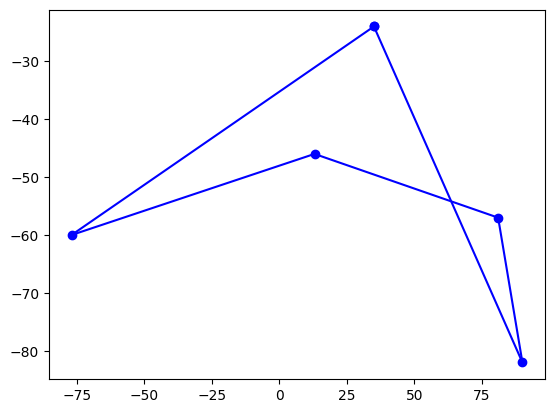

In [8]:
branch_algorytms = BranchAlgorytm(adjacency_matrix, START_CITY)
all_paths = branch_algorytms.tsp_dfs()
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
path_counter.print_min_possible_path()


all_paths = branch_algorytms.tsp_bfs()
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
best_path = path_counter.print_min_possible_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Wszystkie miasta są połączone, połączenia mają wagi

In [9]:
START_CITY = 0


web = WebOfCities(5)
graph = Graph(web.cities)
web.create_weighted_connections_100()
adjacency_matrix = graph.create_adjacency_weighted_matrix()
print(adjacency_matrix)

[[  0.         127.98050633  79.1334948   38.01368175  91.48535402]
 [156.42061885   0.         115.63087823 156.47840107 110.77824696]
 [ 96.71871587  94.60708219   0.         101.06883793  23.23058329]
 [ 46.46116658 191.25137908 123.52857969   0.         125.46270362]
 [ 74.85165329  90.63674751  19.00684087 102.65130296   0.        ]]


min distance is 395.94039325498755 for path
[0, 2, 4, 1, 3, 0]
min distance is 395.94039325498755 for path
[0, 2, 4, 1, 3, 0]


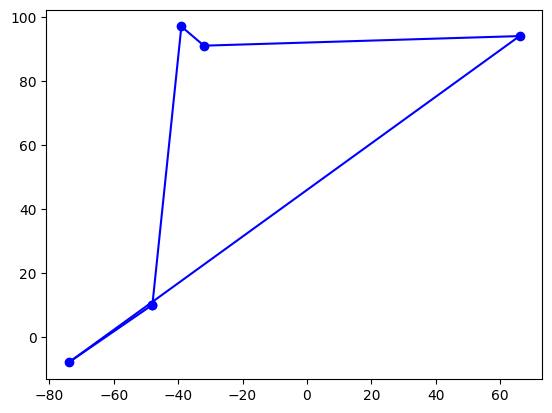

In [10]:
branch_algorytms = BranchAlgorytm(adjacency_matrix, START_CITY)
all_paths = branch_algorytms.tsp_dfs()
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
path_counter.print_min_possible_path()

all_paths = branch_algorytms.tsp_bfs()
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
best_path = path_counter.print_min_possible_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Miasta posiadają 80% połączeń, połączenia mają wagi

In [11]:
START_CITY = 0


web = WebOfCities(5)
graph = Graph(web.cities)
web.create_weighted_connections_80()
adjacency_matrix = graph.create_adjacency_weighted_matrix()
print(adjacency_matrix)

[[  0.          55.54538685 123.86367506   0.          71.92120689]
 [ 67.88880615   0.         102.459553    91.31325205  40.72971888]
 [151.38893619  83.83054336   0.           0.          53.66143867]
 [ 84.87838358  74.71084259 109.22174692   0.           0.        ]
 [ 87.90369731  33.32431545  65.58620282  58.52076555   0.        ]]


min distance is 355.0655276414379 for path
[0, 1, 2, 4, 3, 0]
min distance is 355.0655276414379 for path
[0, 1, 2, 4, 3, 0]


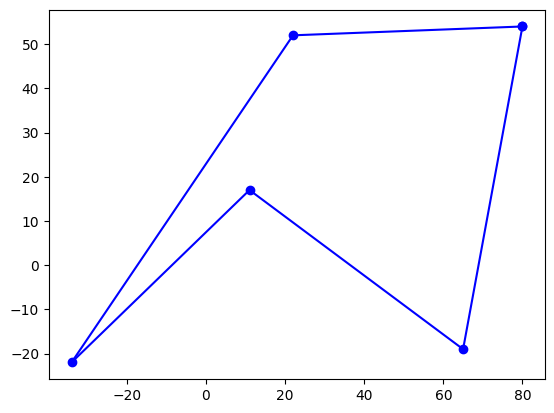

In [12]:
branch_algorytms = BranchAlgorytm(adjacency_matrix, START_CITY)
all_paths = branch_algorytms.tsp_dfs()
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
path_counter.print_min_possible_path()

all_paths = branch_algorytms.tsp_bfs()
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
best_path = path_counter.print_min_possible_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()